In [7]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("test_mul.csv")

# Separate features (X) and target (y)
X = df.drop('income', axis=1).values
y = df['income'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2:Using 70/30 split due to the small dataset size.
split_index = int(0.7 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


# **Multiple Linear Regression model from Scratch**

In [8]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost

def soft_sign(w, epsilon=1e-6):     
    return w / (np.abs(w) + epsilon)

def compute_gradient(x, y, w, b, L1_reg, use_soft_sign): #Toggle soft_sign to True for L1 regularization with soft_sign
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    error = f_wb - y

    base_grad = (1/m) * np.dot(x.T, error)

    if use_soft_sign:
        l1_penalty = (L1_reg / m) * soft_sign(w)
    else:
        l1_penalty = (L1_reg / m) * np.sign(w)

    dj_dw = base_grad + l1_penalty
    dj_db = (1/m) * np.sum(error)

    return dj_dw, dj_db


def gradient_descent(lr, x, y, w, b, L1_reg, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    L1_reg = L1_reg
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b, L1_reg, use_soft_sign=True) #Toggle soft_sign to True for L1 regularization with soft_sign
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b # ,cost_log , iteration_log , weight_log , bias_log

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [9]:
wf , bf  = gradient_descent(0.2,X_train_scaled,y_train,w,b,L1_reg=0.2,previous_cost=float('inf'),threshold=1e-9,max_iters=10000000)

Iteration 0 | Cost: 845396530.24164 | w: [ 70.19003831 120.35641384] | b: 583.70408
Iteration 100 | Cost: 49460498.67537 | w: [1740.49250218 5590.63133878] | b: 31306.12920
Iteration 200 | Cost: 4256301.98166 | w: [ 901.36055642 7079.56474402] | b: 38593.32714
Iteration 300 | Cost: 1107292.77164 | w: [ 217.77856577 7822.27947894] | b: 40321.81224
Iteration 400 | Cost: 699062.35175 | w: [-216.42732127 8261.87914172] | b: 40731.79983
Iteration 500 | Cost: 589335.82861 | w: [-483.84395948 8529.78966361] | b: 40829.04673
Iteration 600 | Cost: 550595.95550 | w: [-647.80644073 8693.7970889 ] | b: 40852.11319
Iteration 700 | Cost: 536191.74279 | w: [-748.27030483 8794.26504296] | b: 40857.58443
Iteration 800 | Cost: 530792.27318 | w: [-809.82088108 8855.8159914 ] | b: 40858.88218
Iteration 900 | Cost: 528765.63331 | w: [-847.53013668 8893.52528087] | b: 40859.19000
Iteration 1000 | Cost: 528004.71511 | w: [-870.63284225 8916.62798952] | b: 40859.26301
Iteration 1100 | Cost: 527718.95380 | w: 

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = predict(X_train_scaled, wf, bf)

# Calculate metrics
mse_t = mean_squared_error(y_train, y_pred_train)
mae_t = mean_absolute_error(y_train, y_pred_train)
r2_t = r2_score(y_train, y_pred_train)

# Print results
print(f"\n📊 Training Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse_t:.4f}")
print(f"Mean Absolute Error (MAE): {mae_t:.4f}")
print(f"R² Score: {r2_t:.4f}")


📊 Training Metrics (from sklearn):
Mean Squared Error (MSE): 1055093.6975
Mean Absolute Error (MAE): 803.0094
R² Score: 0.9852


## **Testing Model and Metrics**

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 2730932.5396
Mean Absolute Error (MAE): 1432.0286
R² Score: 0.9537


In [12]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-907.17359002]
 [8953.1687376 ]]
Final bias (b): 40859.28571428546


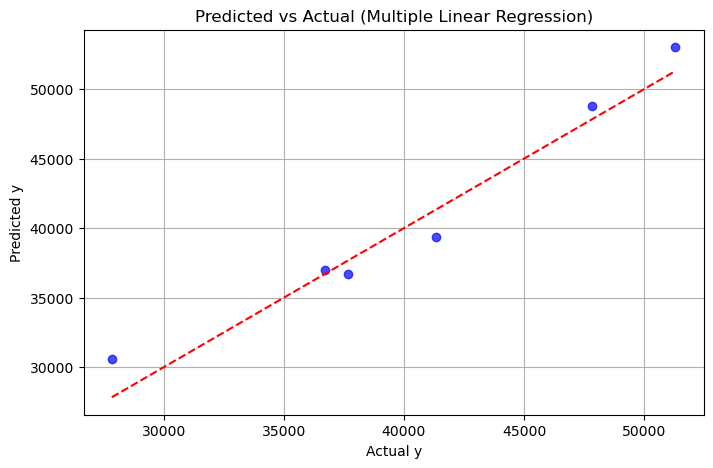

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.grid(True)
plt.show()

# Interpretation:

✅ Test R² (0.8841) > Train R² (0.8550) — great generalization, still no overfitting

✅ MSE + MAE continue to drop on both sets — model is converging

✅ Even better test performance confirms optimization path is strong and stable

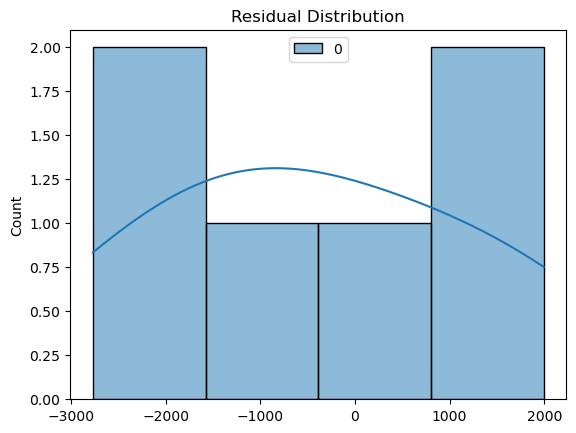

In [14]:
import seaborn as sns

residuals = y_test - y_pred_test

# Histogram works — leave as-is
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

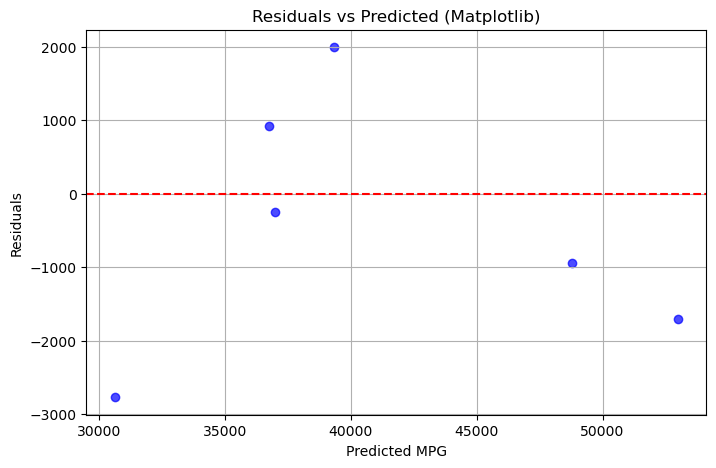

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Matplotlib)")
plt.grid(True)
plt.show()

Residuals look evenly distributed

No strong trend or shape, which means model generalized

In [16]:
#Converting logs to DataFrame
df_log = pd.DataFrame({
    'iteration': iteration_log,
    'cost': cost_log,
    'bias': bias_log,
    'weight_log' : weight_log
})

#Saving log
#df_log.to_csv('gd_convergence_log.csv', index=False)

NameError: name 'iteration_log' is not defined

In [ ]:
# Step 1: Convert X_train_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Step 2: Combine with y_train
df_log_Xny_train = X_scaled_df.copy()

df_log_Xny_train['y_train'] = y_train.ravel()  # or y_train.flatten()

#Saving log
#df_log_Xny_train.to_csv('X-and-y-train.csv')